In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/FinalDataNext.csv")
print(data.shape)

(24436, 4802)


In [0]:
#Tensorflow with GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# 1 - Female,0 - Male
import numpy as np
x = data.iloc[:,0:-2]
y_gender = data.iloc[:,-2]
#print(y_gender)
for i in range(y_gender.shape[0]):
  if y_gender[i] == 2:
    y_gender[i] = 0
#print(y_gender)
y_age = data.iloc[:,-1]


In [0]:
#NN on gender
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y_gender,test_size = 0.30)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Activation, Dropout, BatchNormalization,Input
from keras import backend as K 
from keras.callbacks import History 

model = Sequential()
dim = x_train.shape[1]
#Layer 1
model.add(Dense(64,activation = 'relu',input_dim = dim))
model.add(Dropout(0.5))
#Layer 2
model.add(Dense(32,activation = 'relu',input_dim = dim))
model.add(Dropout(0.5))
#Layer 3
model.add(Dense(32,activation = 'relu',input_dim = dim))
model.add(Dropout(0.5))
#output layer
model.add(Dense(1))
model.add(Activation('hard_sigmoid'))
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [0]:
#Fit/Train the model
bsize = 50  
ans = model.fit(x_train, y_train, batch_size = bsize, epochs = 500,validation_data = (x_test, y_test))

Train on 17105 samples, validate on 7331 samples
Epoch 1/500
17105/17105 [==============================] - 7s 386us/step - loss: 5.7900 - acc: 0.5370 - val_loss: 4.3897 - val_acc: 0.6486
Epoch 2/500
17105/17105 [==============================] - 6s 357us/step - loss: 5.8548 - acc: 0.5699 - val_loss: 4.2879 - val_acc: 0.6425
Epoch 3/500
17105/17105 [==============================] - 6s 357us/step - loss: 5.8324 - acc: 0.5812 - val_loss: 4.7451 - val_acc: 0.6526
Epoch 4/500
17105/17105 [==============================] - 6s 353us/step - loss: 5.5826 - acc: 0.6055 - val_loss: 4.7584 - val_acc: 0.6692
Epoch 5/500
17105/17105 [==============================] - 6s 354us/step - loss: 5.4855 - acc: 0.6171 - val_loss: 5.0963 - val_acc: 0.6590
Epoch 6/500
17105/17105 [==============================] - 6s 356us/step - loss: 5.5403 - acc: 0.6233 - val_loss: 4.5909 - val_acc: 0.6910
Epoch 7/500
17105/17105 [==============================] - 6s 356us/step - loss: 5.2828 - acc: 0.6412 - val_loss: 4.7

In [0]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7331/7331 [==============================] - 1s 125us/step

acc: 82.19%


In [0]:
accuracy_val = []
for i in ans.history['val_acc']:
  accuracy_val.append(i)
accuracy_train = []
for i in ans.history['acc']:
  accuracy_train.append(i)

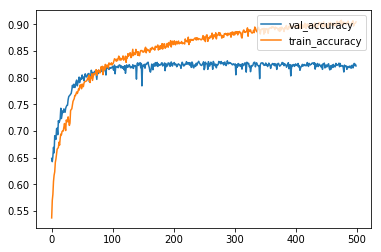

In [0]:
import matplotlib.pyplot as plt
plt.plot(accuracy_val, label='val_accuracy')
plt.plot(accuracy_train, label='train_accuracy')
plt.legend(loc='upper right')
plt.savefig('/content/drive/My Drive/Gender Accuracy.png')
plt.show()


In [0]:
loss_val = []
for i in ans.history['val_loss']:
  loss_val.append(i)
loss_train = []
for i in ans.history['loss']:
  loss_train.append(i)

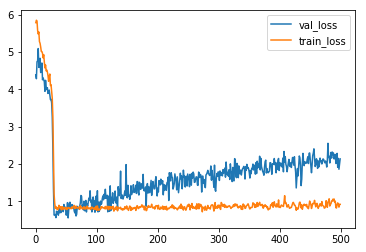

In [0]:
plt.plot(loss_val, label='val_loss')
plt.plot(loss_train, label='train_loss')
plt.legend(loc='upper right')
plt.savefig('/content/drive/My Drive/Gender Loss.png',bbox_inches='tight')
plt.show()


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                307264    
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
__________

# **Testing the model on a group images**

In [0]:
from google.colab.patches import cv2_imshow
import cv2

## Test image 1

Male


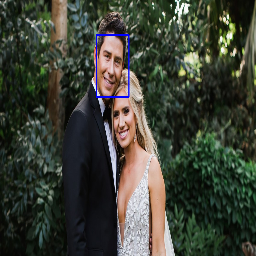

Female


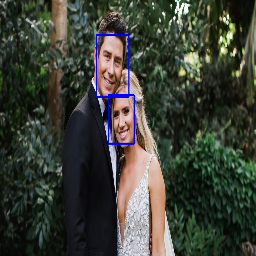

In [0]:
test_image = cv2.imread("/content/drive/My Drive/test.jpg")
#cv2_imshow(test_image)
casc = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(casc)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) 
faces = faceCascade.detectMultiScale(
            test_image,
            scaleFactor=1.38,
            minNeighbors=3
  )
img = test_image.copy()

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  face_img = test_image[y:y+h,x:x+h]
  face_img = cv2.resize(face_img,(40,40))
  face_img = face_img.flatten().reshape(-1,1).transpose()
  x = model.predict(face_img)
  if x == 0:
    print("Male")
  else:
    print("Female")
  f = cv2.resize(img,(256,256))
  cv2_imshow(f)

## Test image 2

Female


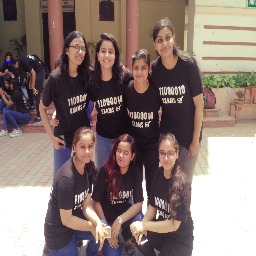

Female


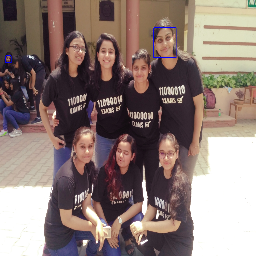

Female


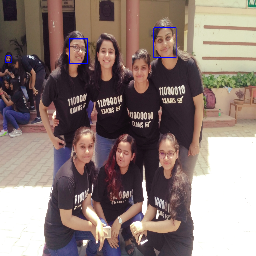

Female


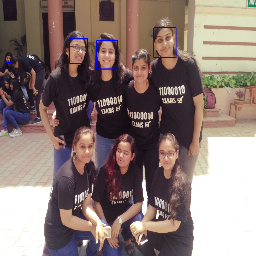

Female


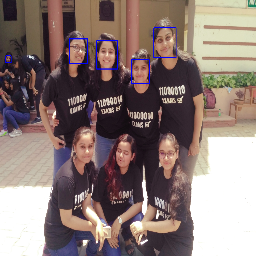

Male


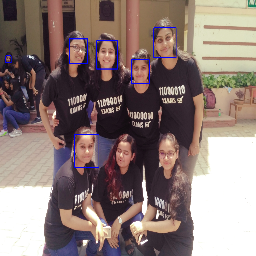

Female


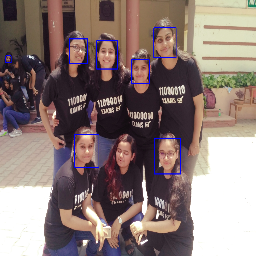

Female


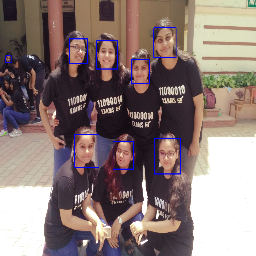

In [0]:
test_image = cv2.imread("/content/drive/My Drive/test2.jpg")
#cv2_imshow(test_image)
casc = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(casc)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) 
faces = faceCascade.detectMultiScale(
            test_image,
            scaleFactor=1.38,
            minNeighbors=3
  )
img = test_image.copy()

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  face_img = test_image[y:y+h,x:x+h]
  face_img = cv2.resize(face_img,(40,40))
  face_img = face_img.flatten().reshape(-1,1).transpose()
  x = model.predict(face_img)
  if x == 0:
    print("Male")
  else:
    print("Female")
  f = cv2.resize(img,(256,256))
  cv2_imshow(f)

## Test image 3

Female


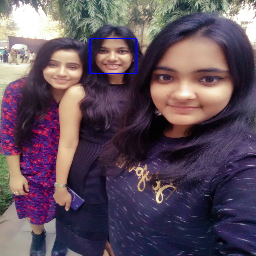

Female


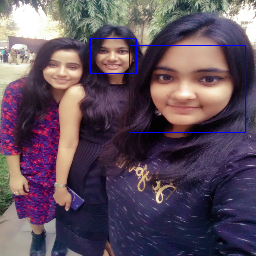

Female


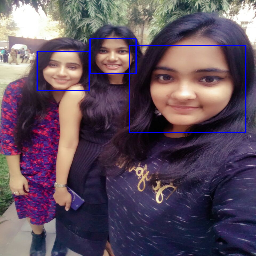

In [0]:
test_image = cv2.imread("/content/drive/My Drive/test3.jpg")
#cv2_imshow(test_image)
casc = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(casc)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) 
faces = faceCascade.detectMultiScale(
            test_image,
            scaleFactor=1.38,
            minNeighbors=3
  )
img = test_image.copy()

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  face_img = test_image[y:y+h,x:x+h]
  face_img = cv2.resize(face_img,(40,40))
  face_img = face_img.flatten().reshape(-1,1).transpose()
  x = model.predict(face_img)
  if x == 0:
    print("Male")
  else:
    print("Female")
  f = cv2.resize(img,(256,256))
  cv2_imshow(f)

## Test image 4

Female


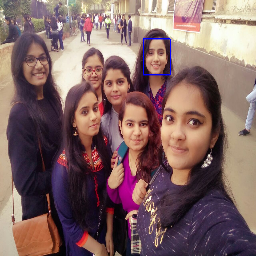

Female


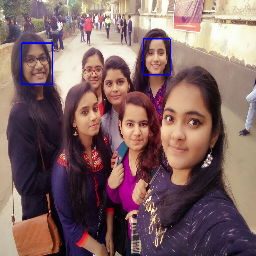

Female


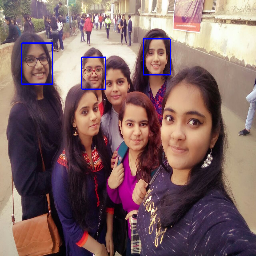

Female


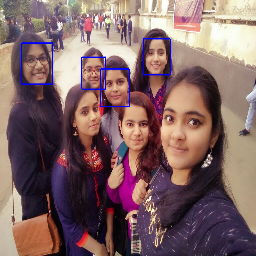

Male


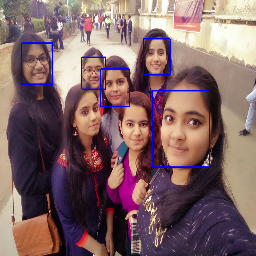

Female


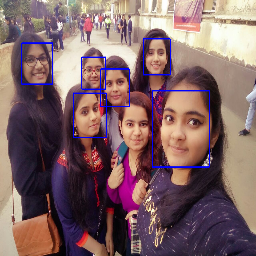

Female


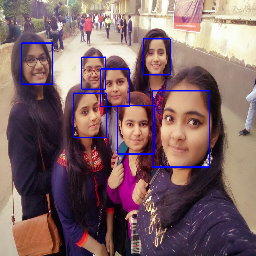

In [0]:
test_image = cv2.imread("/content/drive/My Drive/test4.jpg")
#cv2_imshow(test_image)
casc = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(casc)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) 
faces = faceCascade.detectMultiScale(
            test_image,
            scaleFactor=1.38,
            minNeighbors=3
  )
img = test_image.copy()

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  face_img = test_image[y:y+h,x:x+h]
  face_img = cv2.resize(face_img,(40,40))
  face_img = face_img.flatten().reshape(-1,1).transpose()
  x = model.predict(face_img)
  if x == 0:
    print("Male")
  else:
    print("Female")
  f = cv2.resize(img,(256,256))
  cv2_imshow(f)

## Test image 5


Male


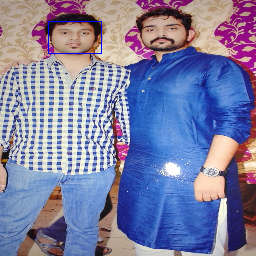

Male


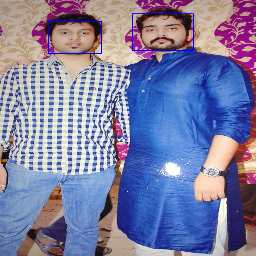

In [0]:
test_image = cv2.imread("/content/drive/My Drive/test7.jpg")
#cv2_imshow(test_image)
casc = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(casc)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY) 
faces = faceCascade.detectMultiScale(
            test_image,
            scaleFactor=1.38,
            minNeighbors=3
  )
img = test_image.copy()

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  face_img = test_image[y:y+h,x:x+h]
  face_img = cv2.resize(face_img,(40,40))
  face_img = face_img.flatten().reshape(-1,1).transpose()
  x = model.predict(face_img)
  if x == 0:
    print("Male")
  else:
    print("Female")
  f = cv2.resize(img,(256,256))
  cv2_imshow(f)